# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import json
import tweepy
import requests
import os
import glob
from tweepy import OAuthHandler
import re

In [3]:
WeRateDogs = pd.read_csv("C:/Users/Hany/Desktop/twitter-archive-enhanced.csv")

In [4]:
WeRateDogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# download image_predictions using the request library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [6]:
# Read tsv file after download via request
WeRateDogs_image = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
WeRateDogs_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

ATH = OAuthHandler(consumer_key, consumer_secret)
ATH.set_access_token(access_token, access_secret)

API = tweepy.API(ATH, wait_on_rate_limit = True)

tweets = WeRateDogs.tweet_id.values
len(tweets)

2356

In [9]:
# Creating Dataframe of tweet_json.txt

tweets_list = []

json_file = open("C:/Users/Hany/Desktop/tweet_json.txt", "r")

for it in json_file:
    try:
        twt = json.loads(it); tweets_list.append(twt)
    except: continue
        
json_file.close()

# Create dataframe:

Tweets_Df = pd.DataFrame()

Tweets_Df['tweet_id'] = list(map(lambda twt: twt['id'], tweets_list))
Tweets_Df['retweet_count'] = list(map(lambda twt: twt['retweet_count'], tweets_list))
Tweets_Df['favorite_count'] = list(map(lambda twt: twt['favorite_count'], tweets_list))
Tweets_Df['created_at'] = list(map(lambda twt: twt['created_at'], tweets_list))
Tweets_Df['full_text'] = list(map(lambda twt: twt['full_text'], tweets_list))

# check for the extracted file
Tweets_Df

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
print(WeRateDogs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
print(WeRateDogs.describe())

           tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17

In [12]:
# check if there are any missing values

WeRateDogs.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
# checking the different names present in the name column
WeRateDogs.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
# dog names that are name titles
WeRateDogs.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [15]:
# dog names not name titles
WeRateDogs.name.loc[WeRateDogs.name.str.istitle() == False].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [16]:
# checking teh names in the doggo column
WeRateDogs.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
# checking the names in the floofer column
WeRateDogs.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
# checking the names in the pupper column
WeRateDogs.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
#checkingteh names in the puppo column
WeRateDogs.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
# how many dogs are both doggo and pupper
WeRateDogs[(WeRateDogs.doggo == "doggo") & (WeRateDogs.pupper == "pupper")].shape

(12, 17)

In [21]:
# how many dogs are both doggo and floofer
WeRateDogs[(WeRateDogs.doggo == "doggo") & (WeRateDogs.floofer == "floofer")].shape

(1, 17)

In [22]:
# how many dogs are both pupper and puppo
WeRateDogs[(WeRateDogs.pupper == "pupper") & (WeRateDogs.puppo == "puppo")].shape

(0, 17)

In [23]:
# how many dogs are both doggo and puppo
WeRateDogs[(WeRateDogs.doggo == "doggo") & (WeRateDogs.puppo == "puppo")].shape

(1, 17)

In [24]:
WeRateDogs_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
WeRateDogs_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
WeRateDogs_image.shape

(2075, 12)

In [27]:
WeRateDogs_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
# Duplicated values:
WeRateDogs_image.duplicated().sum()

0

In [37]:
# Missing values
WeRateDogs_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
# view data types for p1, p2, p3

type(WeRateDogs_image.p1[0]), type(WeRateDogs_image.p2[0]), type(WeRateDogs_image.p3[0])

(str, str, str)

In [39]:
WeRateDogs_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [40]:
WeRateDogs_image.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [41]:
WeRateDogs_image.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [42]:
# Check for images with p2_conf greater than 100%
WeRateDogs_image[WeRateDogs_image.p2_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [43]:
# Check for images with p1_conf greater than 100%
WeRateDogs_image[WeRateDogs_image.p1_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [44]:
# Check for images with p3_conf greater than 100%
WeRateDogs_image[WeRateDogs_image.p3_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
# verify how many predictions in p1 were rightly made.
WeRateDogs_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [46]:
# verify how many predictions in p2 were rightly made.
WeRateDogs_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [47]:
# verify how many predictions in p3 were rightly made.
WeRateDogs_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

## Third Dataset: Tweet API data

In [48]:
Tweets_Df.head()

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


In [49]:
Tweets_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
 4   full_text       2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [50]:
Tweets_Df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
full_text         0
dtype: int64

In [51]:
# check for duplicated rows
Tweets_Df.duplicated().sum()

0

In [52]:
Tweets_Df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [53]:
# check using full_text, the dogs that have two stages (doggo and floofer)
Tweets_Df.full_text[(Tweets_Df.full_text.str.contains ('doggo')) & (Tweets_Df.full_text.str.contains ('floofer'))].count()

0

In [54]:
# check using full_text, the dogs that have two stages (doggo and pupper)
Tweets_Df.full_text[(Tweets_Df.full_text.str.contains ('doggo')) & (Tweets_Df.full_text.str.contains ('pupper'))].count()

10

In [55]:
# check using full_text, the dogs that have two stages (doggo and puppo)
Tweets_Df.full_text[(Tweets_Df.full_text.str.contains ('doggo')) & (Tweets_Df.full_text.str.contains ('puppo'))].count()

2

In [56]:
# check using full_text, the dogs that have two stages (floofer and pupper)
Tweets_Df.full_text[(Tweets_Df.full_text.str.contains ('floofer')) & (Tweets_Df.full_text.str.contains ('pupper'))].count()

0

In [57]:
# check using full_text, the dogs that have two stages (floofer and puppo)
Tweets_Df.full_text[(Tweets_Df.full_text.str.contains ('floofer')) & (Tweets_Df.full_text.str.contains ('puppo'))].count()

0

In [58]:
# check using full_text, the dogs that have two stages (pupper and puppo)
Tweets_Df.full_text[(Tweets_Df.full_text.str.contains ('pupper')) & (Tweets_Df.full_text.str.contains ('puppo'))].count()

0

### Quality issues

1. Missing data in the WeRateDogs dataset.

2. created_at, retweeted_status_timestamp current type is object (str) rather than datetime. so we will change them to datetime.

3. tweet_id should be string not int. so we will convert it to string.

4. Change the first letter of all names to uppercase

5. in_reply_to_status_id, in_reply_to_user_id, timestamp amongst other columns to be dropped.

6. Doggo, floofer, pupper, puppo column all carry some None values, we could drop those values.

7. Some invalid dog names exist ('None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space'). Also dog names are not titled ('BeBe','DonDon','CeCe', 'JD', 'DayZ')

8. Drop all predictions that are not dog predictions.

## Tidiness issues
1. Merge the three datasets
2. The twitter_archive dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [59]:
# Make copies of original pieces of data
WeRateDogs_clean = WeRateDogs.copy()
WeRateDogs_image_clean = WeRateDogs_image.copy()
Tweets_Df_clean = Tweets_Df.copy()

### Issue #1: I will take care of all the tidiness issues mentioned and some quality issues.

#### Define: Merge the three copies datasets using INNER join.

#### Code

In [60]:
# Merge the 3 dataframes into a new dataframe: Tweets
Tweets = pd.merge(WeRateDogs_clean, WeRateDogs_image_clean, how = 'inner', on = ['tweet_id'] )
Tweets = pd.merge(Tweets, Tweets_Df_clean, how = 'inner', on = ['tweet_id'])
Tweets.to_csv('tweet_new.csv', encoding = 'utf-8')

#### Test

In [61]:
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [62]:
# The archive_clean dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured
# replace None with an empty string
Tweets.doggo.replace('None', '', inplace = True)
Tweets.floofer.replace('None', '', inplace = True)
Tweets.puppo.replace('None', '', inplace = True)
Tweets.pupper.replace('None', '', inplace = True)

In [63]:
# Merge four columns
Tweets['dog_types'] = Tweets.doggo + Tweets.pupper + Tweets.puppo + Tweets.floofer
# drop doggo, floofer, pupper, puppo
dog_col = ['doggo', 'floofer', 'pupper', 'puppo']
Tweets.drop(columns = dog_col, inplace = True)

In [64]:
# place a slash for multiple dog type
Tweets.loc[Tweets.dog_types == 'doggopupper', 'dog_types'] = 'doggo|pupper'
Tweets.loc[Tweets.dog_types == 'doggopuppo', 'dog_types'] = 'doggo|puppo'
Tweets.loc[Tweets.dog_types == 'doggofloofer', 'dog_types'] = 'doggo|floofer'

# Issue #2:

#### code:

In [65]:
Tweets = Tweets[Tweets.in_reply_to_status_id.isnull() == True]
Tweets = Tweets[Tweets.retweeted_status_id.isnull() == True]

#### Test:

In [66]:
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  jpg_url                     1971 

# Issue #3:

#### Define: Drop Of Not Dogs

#### Code:

In [67]:
# Find indexes of pictures that are not of dogs
NotDogs = Tweets[(Tweets["p1_dog"] == False) &
         (Tweets["p2_dog"] == False) &
         (Tweets["p3_dog"] == False)]["tweet_id"].index

# Find indexes of pictures that are have a low prediction confidence <0.25
NotDogs = Tweets[(Tweets["p1_dog"] == False) &
         (Tweets["p2_conf"] < 0.25) &
         (Tweets["p3_conf"] < 0.25)]["tweet_id"].index

row = NotDogs.append(NotDogs)

Tweets.drop(row, inplace=True)

#### Test:

In [68]:
Tweets[['p1','p2','p3']].head(20)

,p1,p2,p3
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
4,basset,English_springer,German_short-haired_pointer
5,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant
6,Appenzeller,Border_collie,ice_lolly
7,Pomeranian,Eskimo_dog,Pembroke
8,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever
9,Pembroke,Cardigan,Chihuahua
10,Samoyed,Pomeranian,chow
11,French_bulldog,Labrador_retriever,muzzle


#### Define: Restructure and Delete p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns

#### Code:

In [69]:
dog_breed = []
breed_confidence = []

def confidence(row):
    if row['p1_dog'] == True:
        dog_breed.append(row['p1'])
        breed_confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        dog_breed.append(row['p2'])
        breed_confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        dog_breed.append(row['p3'])
        breed_confidence.append(row['p3_conf'])
    else:
        dog_breed.append('Unknown')
        breed_confidence.append(0)
        

Tweets.apply(confidence, axis=1)

Tweets['dog_breed'] = dog_breed
Tweets['breed_confidence'] = breed_confidence

Tweets = Tweets.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1)

#### Test:


In [70]:
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515 entries, 1 to 2072
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1515 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1515 non-null   object 
 4   source                      1515 non-null   object 
 5   text                        1515 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1515 non-null   object 
 10  rating_numerator            1515 non-null   int64  
 11  rating_denominator          1515 non-null   int64  
 12  name                        1515 non-null   object 
 13  jpg_url                     1515 

## Define: Correct the Data Types

#### Code:

In [71]:
remove_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
               'retweeted_status_timestamp', 'expanded_urls', 'source','text','img_num', 'jpg_url', 'timestamp']
Tweets.drop( columns = remove_cols, inplace=True)

# created_at to datetime
Tweets.created_at = pd.to_datetime(Tweets['created_at'])

# tweet_id to str
Tweets.tweet_id = Tweets.tweet_id.astype(str)

# ratings to float
Tweets.rating_denominator = Tweets.rating_denominator.astype(float)
Tweets.rating_numerator = Tweets.rating_numerator.astype(float)

#### Test:

In [72]:
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515 entries, 1 to 2072
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1515 non-null   object             
 1   rating_numerator    1515 non-null   float64            
 2   rating_denominator  1515 non-null   float64            
 3   name                1515 non-null   object             
 4   retweet_count       1515 non-null   int64              
 5   favorite_count      1515 non-null   int64              
 6   created_at          1515 non-null   datetime64[ns, UTC]
 7   full_text           1515 non-null   object             
 8   dog_types           1515 non-null   object             
 9   dog_breed           1515 non-null   object             
 10  breed_confidence    1515 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(5)
memory usage: 142.0+ KB


In [73]:
# drop dog names with None
Tweets = Tweets.loc[Tweets.name != 'None']

# drop text that says 'We only rate dogs'
row = Tweets[Tweets['full_text'].str.contains("We only rate dogs")]["tweet_id"].index
Tweets.drop(row, inplace = True)
Tweets

,tweet_id,rating_numerator,rating_denominator,name,retweet_count,favorite_count,created_at,full_text,dog_types,dog_breed,breed_confidence
1,892177421306343426,13.0,10.0,Tilly,6514,33819,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,,Chihuahua,0.323581
2,891815181378084864,12.0,10.0,Archie,4328,25461,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,,Chihuahua,0.716012
4,891327558926688256,12.0,10.0,Franklin,9774,41048,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,,basset,0.555712
6,890971913173991426,13.0,10.0,Jax,2158,12041,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,,Appenzeller,0.341703
8,890609185150312448,13.0,10.0,Zoey,4429,28226,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,,Irish_terrier,0.487574
...,...,...,...,...,...,...,...,...,...,...,...
2065,666055525042405380,10.0,10.0,a,261,448,2015-11-16 00:49:46+00:00,Here is a Siberian heavily armored polar bear ...,,chow,0.692517
2067,666050758794694657,10.0,10.0,a,60,136,2015-11-16 00:30:50+00:00,This is a truly beautiful English Wilson Staff...,,Bernese_mountain_dog,0.651137
2069,666044226329800704,6.0,10.0,a,147,311,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,,Rhodesian_ridgeback,0.408143
2070,666033412701032449,9.0,10.0,a,47,128,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,,German_shepherd,0.596461


In [74]:
# Create a list to re-sort the dataframe columns
sort_cols = ['tweet_id', 'created_at', 'name','full_text','dog_types', 'dog_breed','retweet_count', 'favorite_count',
             'rating_numerator', 'rating_denominator', 'breed_confidence']

Tweets = Tweets[sort_cols]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
Tweets.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [76]:
DF_Analysis = Tweets

In [77]:
DF_Analysis.head()

,tweet_id,created_at,name,full_text,dog_types,dog_breed,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,This is Tilly. She's just checking pup on you....,,Chihuahua,6514,33819,13.0,10.0,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,This is Archie. He is a rare Norwegian Pouncin...,,Chihuahua,4328,25461,12.0,10.0,0.716012
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,This is Franklin. He would like you to stop ca...,,basset,9774,41048,12.0,10.0,0.555712
6,890971913173991426,2017-07-28 16:27:12+00:00,Jax,Meet Jax. He enjoys ice cream so much he gets ...,,Appenzeller,2158,12041,13.0,10.0,0.341703
8,890609185150312448,2017-07-27 16:25:51+00:00,Zoey,This is Zoey. She doesn't want to be one of th...,,Irish_terrier,4429,28226,13.0,10.0,0.487574


In [78]:
DF_Analysis['dog_breed'].value_counts()

golden_retriever           98
Pembroke                   67
Labrador_retriever         65
Chihuahua                  61
pug                        41
                           ..
Japanese_spaniel            1
standard_schnauzer          1
clumber                     1
Brabancon_griffon           1
black-and-tan_coonhound     1
Name: dog_breed, Length: 111, dtype: int64

In [79]:
DF_Analysis['dog_types'].value_counts()

                987
pupper           96
doggo            31
puppo            14
floofer           5
doggo|pupper      4
Name: dog_types, dtype: int64

In [80]:
DF_Analysis['name'].value_counts()

a             39
Cooper        10
Charlie       10
Oliver         9
Lucy           8
              ..
Klein          1
DonDon         1
Chevy          1
Philbert       1
Christoper     1
Name: name, Length: 782, dtype: int64

In [81]:
# group dataset by dog breed, by dog type and by name
Analysis_breed = DF_Analysis.groupby(['dog_breed']).sum()
Analysis_type = DF_Analysis.groupby(['dog_types']).sum()
Analysis_name = DF_Analysis.groupby(['name']).sum()

In [82]:
Analysis_breed.head()

,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
dog_breed,,,,,
Afghan_hound,17928,51980,29.0,30.0,1.301878
Airedale,14106,54524,92.0,90.0,5.510836
American_Staffordshire_terrier,20705,77191,109.0,100.0,6.623528
Appenzeller,2158,12041,13.0,10.0,0.341703
Australian_terrier,6157,22255,23.0,20.0,0.615167


In [83]:
# sort dog breed by favourite counts
Analysis_breed.sort_values(by=['favorite_count'],ascending=False)
# sort dog types by favourite counts
Analysis_type.sort_values(by=['favorite_count'],ascending=False)
# sort dog types by favourite counts
Analysis_type.sort_values(by=['retweet_count'],ascending=False)
# sort dog name by favourite counts
Analysis_name.sort_values(by=['favorite_count'],ascending=False)
# sort dog name by favourite counts
Analysis_name.sort_values(by=['retweet_count'],ascending=False)

,retweet_count,favorite_count,rating_numerator,rating_denominator,breed_confidence
name,,,,,
Stephan,56625,107015,13.0,10.0,0.505370
Bo,54924,136148,60.0,50.0,3.268917
Duddles,45849,107956,13.0,10.0,0.383404
Buddy,37686,72809,34.0,30.0,1.460446
a,37236,108054,413.0,430.0,21.542013
...,...,...,...,...,...
Kollin,61,248,9.0,10.0,0.980511
Fwed,60,211,8.0,10.0,0.557009
Keet,57,227,10.0,10.0,0.825678


### Insights:
1. Most common dog type is the pupper followed by the doggo and they both have the highest (717801) and second highest (571723) followers
2. The dog names Stephan, Bo and Duddles had the top three highest followers.
3. Most common dog breed prediction is golden_retriever followed by pembroke.

### Visualization

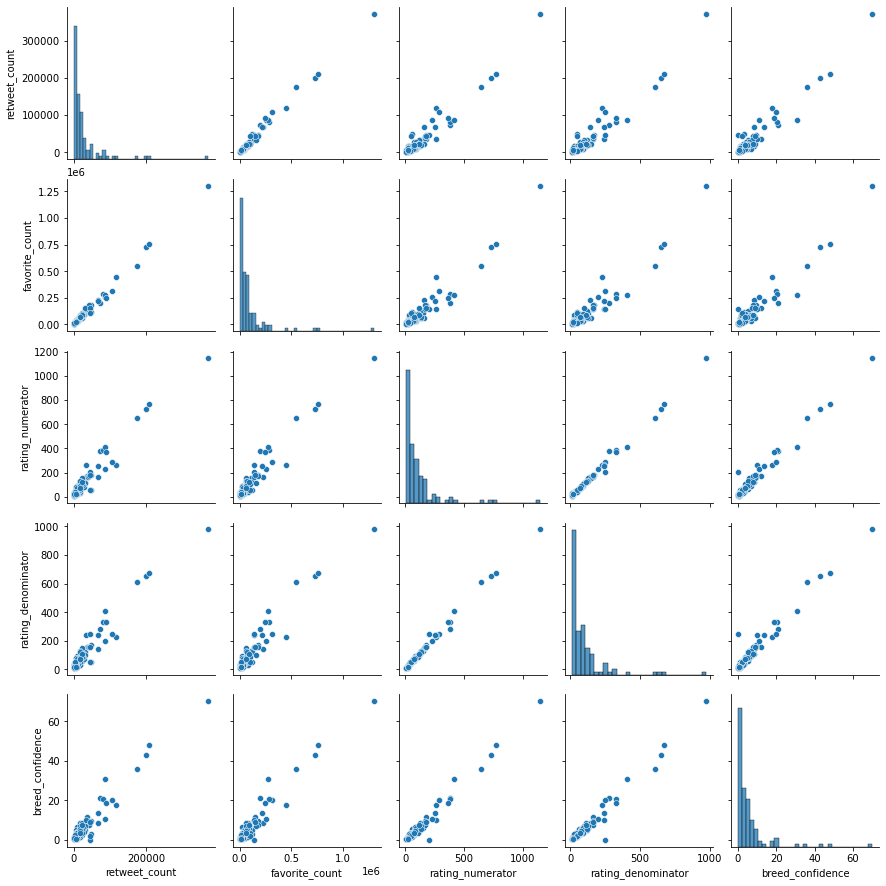

In [84]:
sns.pairplot(Analysis_breed)

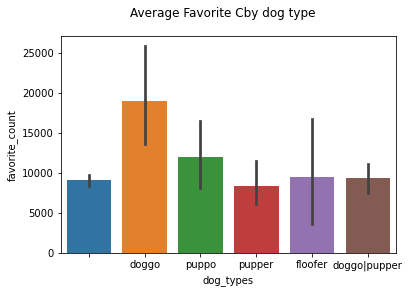

In [85]:
pt = sns.barplot(data = DF_Analysis, x = 'dog_types', y = 'favorite_count')
pt.figure.suptitle('Average Favorite Cby dog type'); 

Looking at the plots above, we note the following:
The average retweet_count for the doggo is the highest, where the average retweet_count for the pupper is the lowest

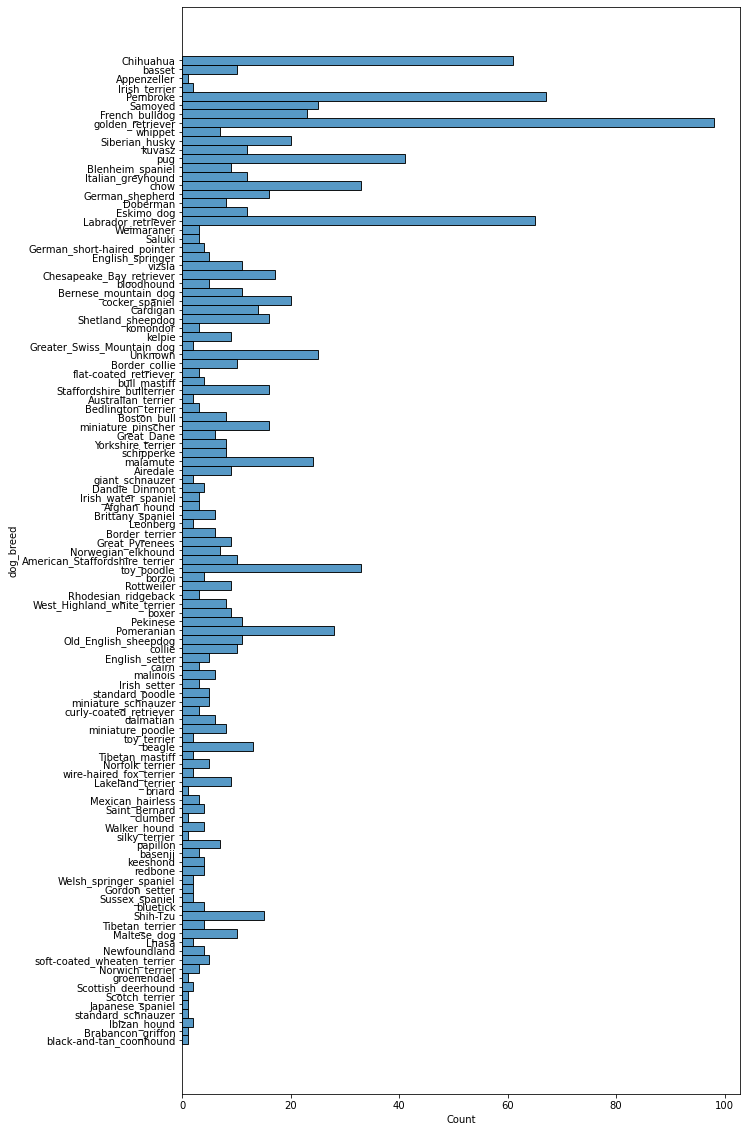

In [86]:
# Plot a histogram of dog_breed
dims = (10, 20)
fig, ax = plt.subplots(figsize=dims)
sns.histplot(ax = ax, y = DF_Analysis['dog_breed'], stat= "count");